# Part I - (Loan Data from Prosper)
## by (Sulyman Ahmed)


## Introduction

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, Credit score range, current loan status, borrower income, and many others.
>  [ All column information](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0)




## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# read the dataset in to data frame
df = pd.read_csv('C:/Users/Bluechip/Desktop/ALX-T/Project 3/prosperLoanData.csv')

In [3]:
df.head()

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   

   BorrowerRate  LenderYield  ...  LP_ServiceFees  LP_CollectionFees  \
0        0.1580       0.1380  ...         -133.18                0.0   
1        0.0920       0.0820  ...            0.00                0.0   
2        0.2750       0.2400  ...          -24.20                0.0   
3        0.0974       0.0874  ...         -108.01                0.0   
4        0.2085       0.1985  ...          -60.27                0.0   

   LP_GrossPrincipalLoss  LP_NetPrincipalLoss LP_NonPrincipalRecoverypayments  \
0                    0.0                  0.0                             0.0   
1                    0.0                  0.0                             0.0   
2                    0.0                  0.0                             0.0   
3                    0.0                  0.0                             0.0   
4                    0.0                  0.0                             0.0   

   PercentFunded  Recommendations InvestmentFromFriendsCount  \
0            1.0                0                          0   
1            1.0                0                          0   
2            1.0                0                          0   
3            1.0                0                          0   
4            1.0                0                          0   

  InvestmentFromFriendsAmount Investors  
0                         0.0       258  
1                         0.0         1  
2                         0.0        41  
3                         0.0       158  
4                         0.0        20  

[5 rows x 81 columns]

In [4]:
df.info()
df.describe()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

(113937, 81)

There is a lot of data rows and a lot of columns that have much Null value, so I choose specific columns, I'll work on it and drop all of the others

In [5]:
# creating a data frame for the columns that are needed in this analysis
cols = ['Term','LoanStatus','ListingCategory (numeric)','EmploymentStatus','IsBorrowerHomeowner',
        'CreditScoreRangeLower','CreditScoreRangeUpper','StatedMonthlyIncome','LoanOriginalAmount','MonthlyLoanPayment']

In [6]:
# filter the data on that cols and save it in a new dataframe colled new_df
new_df = df[cols]
new_df.head()

Term LoanStatus  ListingCategory (numeric) EmploymentStatus  \
0    36  Completed                          0    Self-employed   
1    36    Current                          2         Employed   
2    36  Completed                          0    Not available   
3    36    Current                         16         Employed   
4    36    Current                          2         Employed   

   IsBorrowerHomeowner  CreditScoreRangeLower  CreditScoreRangeUpper  \
0                 True                  640.0                  659.0   
1                False                  680.0                  699.0   
2                False                  480.0                  499.0   
3                 True                  800.0                  819.0   
4                 True                  680.0                  699.0   

   StatedMonthlyIncome  LoanOriginalAmount  MonthlyLoanPayment  
0          3083.333333                9425              330.43  
1          6125.000000               10000              318.93  
2          2083.333333                3001              123.32  
3          2875.000000               10000              321.45  
4          9583.333333               15000              563.97

In [7]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Term                       113937 non-null  int64  
 1   LoanStatus                 113937 non-null  object 
 2   ListingCategory (numeric)  113937 non-null  int64  
 3   EmploymentStatus           111682 non-null  object 
 4   IsBorrowerHomeowner        113937 non-null  bool   
 5   CreditScoreRangeLower      113346 non-null  float64
 6   CreditScoreRangeUpper      113346 non-null  float64
 7   StatedMonthlyIncome        113937 non-null  float64
 8   LoanOriginalAmount         113937 non-null  int64  
 9   MonthlyLoanPayment         113937 non-null  float64
dtypes: bool(1), float64(4), int64(3), object(2)
memory usage: 7.9+ MB


In [8]:
# making a copy of the data set
loan_data=new_df.copy()

#### Define
* EmploymentStatus , CreditScoreRangeLower, CreditScoreRangeUpper have Null value

* I will replace NaN value in EmploymentStatus with "Not available" and i will drop NaN value in CreditScoreRangeLower and CreditScoreRangeUpper

In [9]:
# checking for null values form the data set
loan_data[['EmploymentStatus', 'CreditScoreRangeLower', 'CreditScoreRangeUpper']].isnull().value_counts()

EmploymentStatus  CreditScoreRangeLower  CreditScoreRangeUpper
False             False                  False                    111680
True              False                  False                      1666
                  True                   True                        589
False             True                   True                          2
dtype: int64

#### Code

In [10]:
loan_data['EmploymentStatus'].fillna('Not available', inplace=True)

In [11]:
loan_data.dropna(subset=['CreditScoreRangeLower', 'CreditScoreRangeUpper'], inplace=True)

#### Test

In [12]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113346 entries, 0 to 113936
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Term                       113346 non-null  int64  
 1   LoanStatus                 113346 non-null  object 
 2   ListingCategory (numeric)  113346 non-null  int64  
 3   EmploymentStatus           113346 non-null  object 
 4   IsBorrowerHomeowner        113346 non-null  bool   
 5   CreditScoreRangeLower      113346 non-null  float64
 6   CreditScoreRangeUpper      113346 non-null  float64
 7   StatedMonthlyIncome        113346 non-null  float64
 8   LoanOriginalAmount         113346 non-null  int64  
 9   MonthlyLoanPayment         113346 non-null  float64
dtypes: bool(1), float64(4), int64(3), object(2)
memory usage: 8.8+ MB


#### Define

I will convert CreditScoreRangeLower, CreditScoreRangeUpper to one column have its score regard to format below and make it in order format
> **Poor:** 300 - 549

> **Fair:** 550 - 649

> **Good:** 650 -749

> **Excellent:** 750 - 900

In [13]:
loan_data.query('CreditScoreRangeLower < 300').shape[0],loan_data.query('CreditScoreRangeUpper < 549').shape[0]

(133, 2809)

In [14]:
loan_data.query('CreditScoreRangeLower > 750').shape[0],loan_data.query('CreditScoreRangeUpper > 900').shape[0]

(16089, 0)

In [15]:
# little function to cluster score
def Credit_score(x):
    outcome=""
    if x >= 300 :
        outcome = "Poor"
    if x>=550:
        outcome = "Fair"
    if x>=650:
        outcome = "Good"
    if x>=750:
        outcome = "Excellent"
    return outcome

In [16]:
loan_data['CreditScore'] = loan_data['CreditScoreRangeLower'].apply(Credit_score)

In [17]:
# Drop the redundant columns
cols = ['CreditScoreRangeLower','CreditScoreRangeUpper']
loan_data.drop(columns=cols , axis=1 , inplace=True)

In [18]:
order = ['Poor','Fair','Good','Excellent']
order_class = pd.api.types.CategoricalDtype(ordered=True ,categories= order)
loan_data['CreditScore'] = loan_data['CreditScore'].astype(order_class)

#### Test

In [19]:
loan_data.head(5)

Term LoanStatus  ListingCategory (numeric) EmploymentStatus  \
0    36  Completed                          0    Self-employed   
1    36    Current                          2         Employed   
2    36  Completed                          0    Not available   
3    36    Current                         16         Employed   
4    36    Current                          2         Employed   

   IsBorrowerHomeowner  StatedMonthlyIncome  LoanOriginalAmount  \
0                 True          3083.333333                9425   
1                False          6125.000000               10000   
2                False          2083.333333                3001   
3                 True          2875.000000               10000   
4                 True          9583.333333               15000   

   MonthlyLoanPayment CreditScore  
0              330.43        Fair  
1              318.93        Good  
2              123.32        Poor  
3              321.45   Excellent  
4              563.97        Good

#### Define

> Replace Term column from [12,36,60] month to [1,3,5] year


#### Code

In [20]:
def H_M_Yers(x):
    return x/12

loan_data['Term'] = loan_data['Term'].apply(H_M_Yers).astype(int)

#### Test

In [21]:
loan_data.head()

Term LoanStatus  ListingCategory (numeric) EmploymentStatus  \
0     3  Completed                          0    Self-employed   
1     3    Current                          2         Employed   
2     3  Completed                          0    Not available   
3     3    Current                         16         Employed   
4     3    Current                          2         Employed   

   IsBorrowerHomeowner  StatedMonthlyIncome  LoanOriginalAmount  \
0                 True          3083.333333                9425   
1                False          6125.000000               10000   
2                False          2083.333333                3001   
3                 True          2875.000000               10000   
4                 True          9583.333333               15000   

   MonthlyLoanPayment CreditScore  
0              330.43        Fair  
1              318.93        Good  
2              123.32        Poor  
3              321.45   Excellent  
4              563.97        Good

> Convert ListingCategory (numeric) to the corresponding element

> 0 - Not Available 1 - Debt Consolidation 2 - Home Improvement 3 - Business 4 - Personal Loan 5 - Student Use 6 - Auto 7 - Other 8 - Baby&Adoption 9 - Boat 10 - Cosmetic Procedure 11 - Engagement Ring 12 - Green Loans 13 - Household Expenses 14 - Large Purchases 15 - Medical/Dental 16 - Motorcycle 17 - RV 18 - Taxes 19 - Vacation 20 - Wedding Loans

In [22]:
listing_Cat = {0:"Not Available",
               1:"Debt Consolidation",
               2:"Home Improvement",
               3:"Business",
               4:"Personal Loan",
               5:"Student Use",
               6:"Auto",
               7:"Other",
               8:"Baby&Adoption",
               9:"Boat",
               10:"Cosmetic Procedure",
               11:"Engagement Ring",
               12:"Green Loans",
               13:"Household Expenses",
               14:"Large Purchases",
               15:"Medical/Dental",
               16:"Motorcycle",
               17:"RV",
               18:"Taxes",
               19:"Vacation",
               20:"Wedding Loans",}
def Lst_Cat(x,y=listing_Cat):
    return y[x]
loan_data.rename(columns={'ListingCategory (numeric)': 'ListingCategory'},inplace=True)
loan_data['ListingCategory'] = loan_data['ListingCategory'].apply(Lst_Cat)

In [23]:
loan_data.head()

Term LoanStatus   ListingCategory EmploymentStatus  IsBorrowerHomeowner  \
0     3  Completed     Not Available    Self-employed                 True   
1     3    Current  Home Improvement         Employed                False   
2     3  Completed     Not Available    Not available                False   
3     3    Current        Motorcycle         Employed                 True   
4     3    Current  Home Improvement         Employed                 True   

   StatedMonthlyIncome  LoanOriginalAmount  MonthlyLoanPayment CreditScore  
0          3083.333333                9425              330.43        Fair  
1          6125.000000               10000              318.93        Good  
2          2083.333333                3001              123.32        Poor  
3          2875.000000               10000              321.45   Excellent  
4          9583.333333               15000              563.97        Good

In [24]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113346 entries, 0 to 113936
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   Term                 113346 non-null  int32   
 1   LoanStatus           113346 non-null  object  
 2   ListingCategory      113346 non-null  object  
 3   EmploymentStatus     113346 non-null  object  
 4   IsBorrowerHomeowner  113346 non-null  bool    
 5   StatedMonthlyIncome  113346 non-null  float64 
 6   LoanOriginalAmount   113346 non-null  int64   
 7   MonthlyLoanPayment   113346 non-null  float64 
 8   CreditScore          113213 non-null  category
dtypes: bool(1), category(1), float64(2), int32(1), int64(1), object(3)
memory usage: 6.7+ MB


### What is the structure of your dataset?

> After Cleansing there are 113346 Loans in the dataset with 9 features (Term,LoanStatus,ListingCategory,EmploymentStatus,etc..)with 3 numeric values [StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment] and one bool [IsBorrowerHomeowner] and others are categorical with two with order in nature [Term,CreditScore]

### What is/are the main feature(s) of interest in your dataset?

> I am interested in factors that affect Loan Status
### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think all 8 features will support my investigation. I choose these features because i think it will help

## Univariate Exploration

> Let's see the distribution of numeric values [StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment]



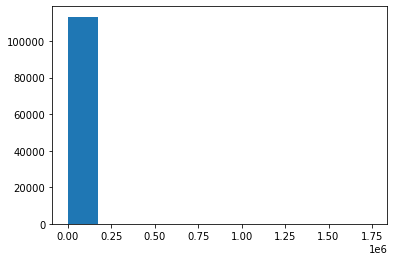

In [25]:
plt.hist(x=loan_data.StatedMonthlyIncome);

Ohh! There are lot of outlier😥 let's clean

Question: -At what value do I consider this is outlier? 
I suggest to plot a box plot

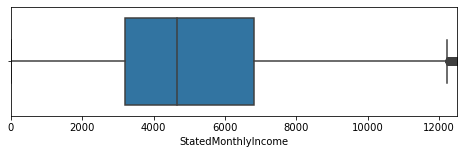

In [26]:
plt.figure(figsize=[8,2])
sb.boxplot(data=loan_data,x='StatedMonthlyIncome')
plt.xlim([0,12500]);

In [27]:
loan_data[loan_data['StatedMonthlyIncome']==0]

Term  LoanStatus     ListingCategory EmploymentStatus  \
78         3  Chargedoff            Business        Full-time   
100        3  Chargedoff  Household Expenses     Not employed   
108        3   Completed  Debt Consolidation        Full-time   
125        3     Current               Other     Not employed   
170        3   Completed               Other     Not employed   
...      ...         ...                 ...              ...   
113686     3   Completed       Not Available        Full-time   
113761     5     Current  Debt Consolidation     Not employed   
113766     3     Current            Vacation     Not employed   
113767     3  Chargedoff            Business    Self-employed   
113803     3   Defaulted               Other    Self-employed   

        IsBorrowerHomeowner  StatedMonthlyIncome  LoanOriginalAmount  \
78                     True                  0.0                4800   
100                   False                  0.0                4000   
108                   False                  0.0               14000   
125                   False                  0.0                5000   
170                    True                  0.0               10000   
...                     ...                  ...                 ...   
113686                False                  0.0               14900   
113761                False                  0.0                7000   
113766                False                  0.0                4500   
113767                False                  0.0                5000   
113803                 True                  0.0                5000   

        MonthlyLoanPayment CreditScore  
78                  171.13        Good  
100                 172.76        Good  
108                 564.07        Fair  
125                 217.74        Fair  
170                 397.55   Excellent  
...                    ...         ...  
113686              560.21        Good  
113761              162.33        Good  
113766              144.44        Good  
113767              224.77        Poor  
113803              161.10        Good  

[1388 rows x 9 columns]

**There is a 1388 row without Stated Monthly Income**

Therefore, I will drop them

In [28]:
index = loan_data[loan_data['StatedMonthlyIncome']==0].index
loan_data.drop(index,inplace=True)

In [29]:
loan_data[loan_data['StatedMonthlyIncome']>=12500]

Term LoanStatus     ListingCategory EmploymentStatus  \
33         3  Completed               Other         Employed   
40         5    Current  Debt Consolidation    Self-employed   
45         5    Current  Debt Consolidation         Employed   
48         5    Current  Debt Consolidation         Employed   
95         3    Current  Debt Consolidation         Employed   
...      ...        ...                 ...              ...   
113829     1  Completed  Household Expenses         Employed   
113865     5  Completed  Household Expenses         Employed   
113866     3  Completed            Business    Self-employed   
113887     5    Current  Debt Consolidation         Employed   
113910     3    Current  Debt Consolidation         Employed   

        IsBorrowerHomeowner  StatedMonthlyIncome  LoanOriginalAmount  \
33                    False         13083.333333               16000   
40                    False         12750.000000               15000   
45                     True         16000.000000               25000   
48                     True         14583.333333               15000   
95                     True         14833.333333               20000   
...                     ...                  ...                 ...   
113829                False         15000.000000                5000   
113865                False         13333.333333                9500   
113866                False         14833.333333                3500   
113887                 True         12500.000000                6500   
113910                False         18756.000000                4000   

        MonthlyLoanPayment CreditScore  
33                  500.28   Excellent  
40                  374.81        Good  
45                  543.44        Good  
48                  358.35        Good  
95                  644.41        Good  
...                    ...         ...  
113829              453.09        Fair  
113865              278.23        Good  
113866              127.04        Fair  
113887              167.69        Good  
113910              166.54        Fair  

[5512 rows x 9 columns]

There is a 5512 row considered outliers in Stated Monthly Income

I will drop them too

In [30]:
index = loan_data[loan_data['StatedMonthlyIncome']>=12500].index
loan_data.drop(index,inplace=True)

Let's plot the distribution for StatedMonthlyIncome again

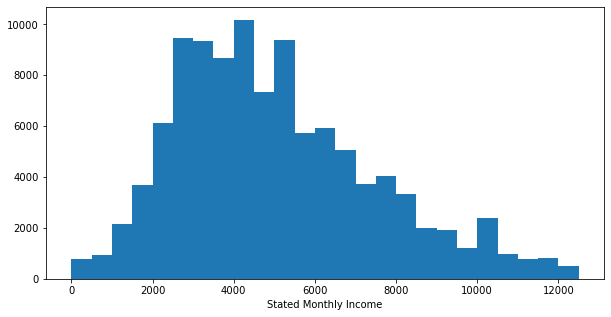

In [31]:
x_bins = np.arange(0,loan_data.StatedMonthlyIncome.max()+500,500)
plt.figure(figsize=[10,5])
plt.hist(x=loan_data.StatedMonthlyIncome,bins = x_bins);
plt.xlabel("Stated Monthly Income");

This distribution is right-skewed most of the monthly income for the borrowers in range 2000 to 6000

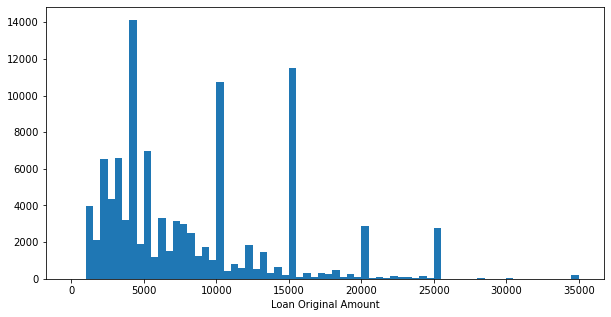

In [32]:
x_bins = np.arange(0,loan_data.LoanOriginalAmount.max()+500,500)
plt.figure(figsize=[10,5])
plt.hist(x=loan_data.LoanOriginalAmount,bins=x_bins);
plt.xlabel("Loan Original Amount");

There are a much big spikes in different amount like 4000, 5000, 10000 and 15000. Almost few ask for fractions and a lot ask for multiples of five

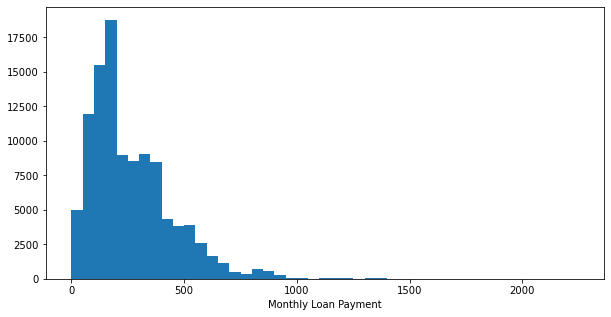

In [33]:
x_bins = np.arange(0,loan_data.MonthlyLoanPayment.max()+50,50)
plt.figure(figsize=[10,5])
plt.hist(x=loan_data.MonthlyLoanPayment,bins=x_bins);
plt.xlabel("Monthly Loan Payment");

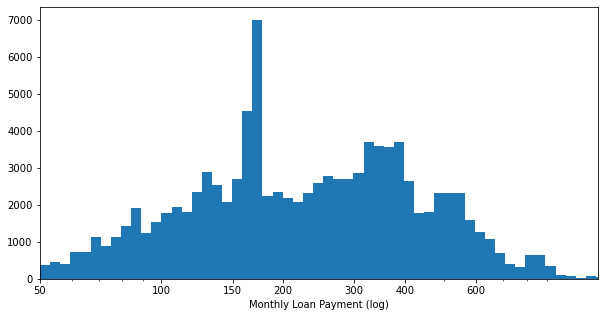

In [34]:
x_bins = 10**np.arange(0,np.log10(loan_data.MonthlyLoanPayment.max())+0.025,0.025)
plt.figure(figsize=[10,5])
plt.hist(x=loan_data.MonthlyLoanPayment,bins=x_bins);
plt.xscale('log')
plt.xticks([50, 100, 150, 200, 300, 400,600], ['50', '100', '150', '200', '300', '400','600'])
plt.xlim([50,1200])
plt.xlabel("Monthly Loan Payment (log)");

Monthly Loan Payment has a long-tailed distribution,a lot of borrowers pay little and few pay much.When plotted in log scale the distribution is a multimodal and have a big spike between 150 to 200 and one before 400


> Next up let's see the categorical [Term, LoanStatus, ListingCategory, EmploymentStatus, IsBorrowerHomeowner, CreditScore]

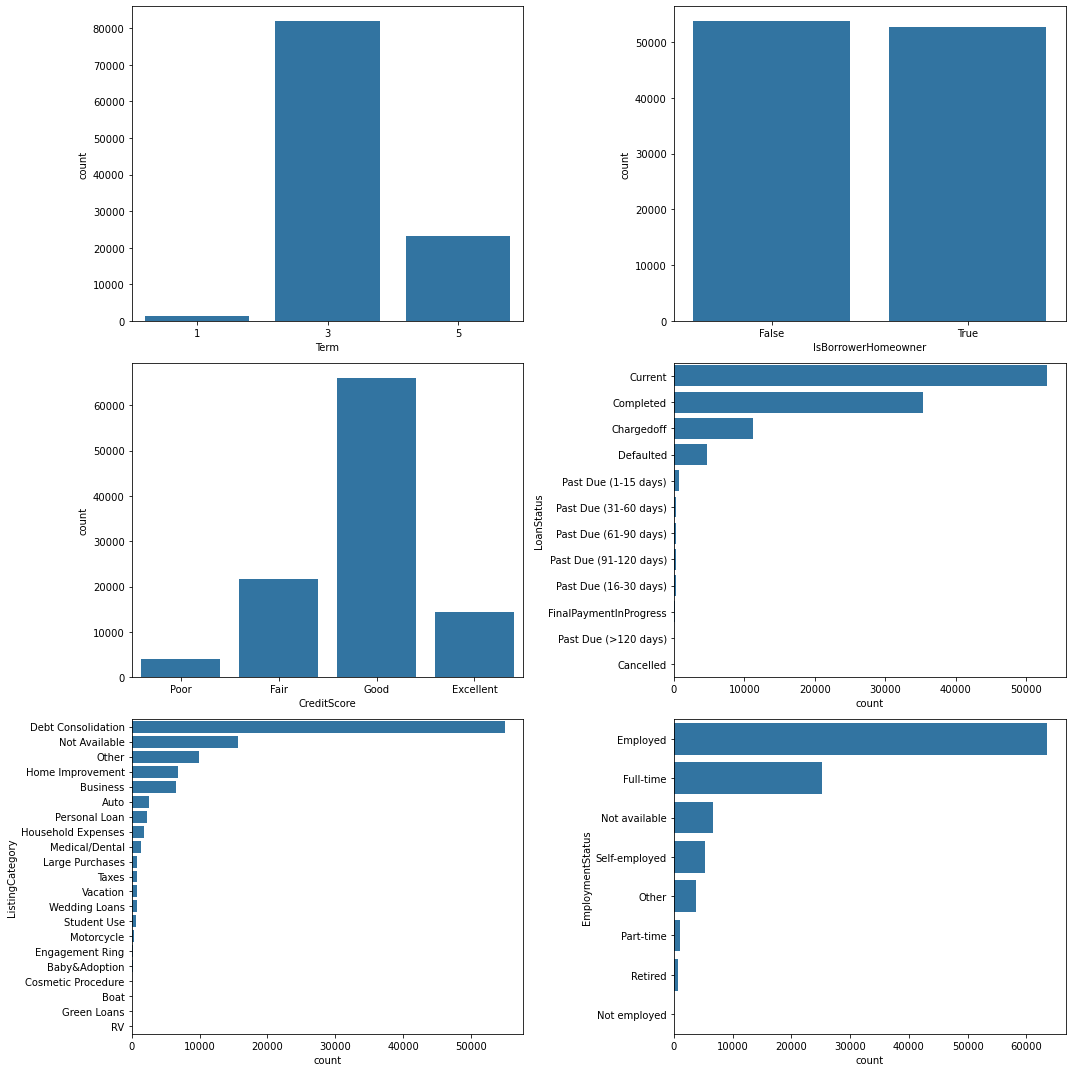

In [35]:
fig, ax = plt.subplots(nrows=3,ncols=2, figsize = [15,15])

default_color = sb.color_palette()[0]
sb.countplot(data = loan_data, x = 'Term', color = default_color, ax = ax[0,0])

sb.countplot(data = loan_data, x = 'IsBorrowerHomeowner', color = default_color, ax = ax[0,1])

sb.countplot(data = loan_data, x = 'CreditScore', color = default_color, ax = ax[1,0])

sb.countplot(data = loan_data, y = 'LoanStatus',order=loan_data.LoanStatus.value_counts().index
             ,color = default_color, ax = ax[1,1])

sb.countplot(data = loan_data, y = 'ListingCategory',order=loan_data.ListingCategory.value_counts().index
             , color = default_color, ax = ax[2,0])

sb.countplot(data = loan_data, y = 'EmploymentStatus',order=loan_data.EmploymentStatus.value_counts().index
             , color = default_color, ax = ax[2,1])

plt.tight_layout()

Most of the borrowers loans term is for 3 years then 5 years and 1 year. almost 50:50 borrowers have home a slightly bigger in False. Credit score for borrowers seems good most of them in the good score followed by Fair. In the Loan Status few borrowers have passed due and almost pay in time and there is about 3000 defaulted. A big spike in Debt Consolidation and that is a predictable and high percentage for employed and full-time Employment Status for borrowers

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Most of the borrowers pay in time and there is about 3000 defaulted Loan and a little percentage that passed their due date

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> When investigating the MonthlyLoanPayment a long right tail were identified so i transform to log scale and notice a big spike between 150 to 200 dollar and most loan term is 3 years term and borrowers take a Loan for Debt Consolidation in high percentage and borrowers in most are Employed or full time

## Bivariate Exploration

> Let's see the relation between LoanStatus and [StatedMonthlyIncome,MonthlyLoanPayment,LoanOriginalAmount]

In [36]:
num_var = ['StatedMonthlyIncome','MonthlyLoanPayment','LoanOriginalAmount']
ordr = ['Current','Completed','Chargedoff','FinalPaymentInProgress','Past Due (1-15 days)','Past Due (16-30 days)'
        ,'Past Due (31-60 days)','Past Due (61-90 days)','Past Due (91-120 days)','Past Due (>120 days)','Defaulted','Cancelled']

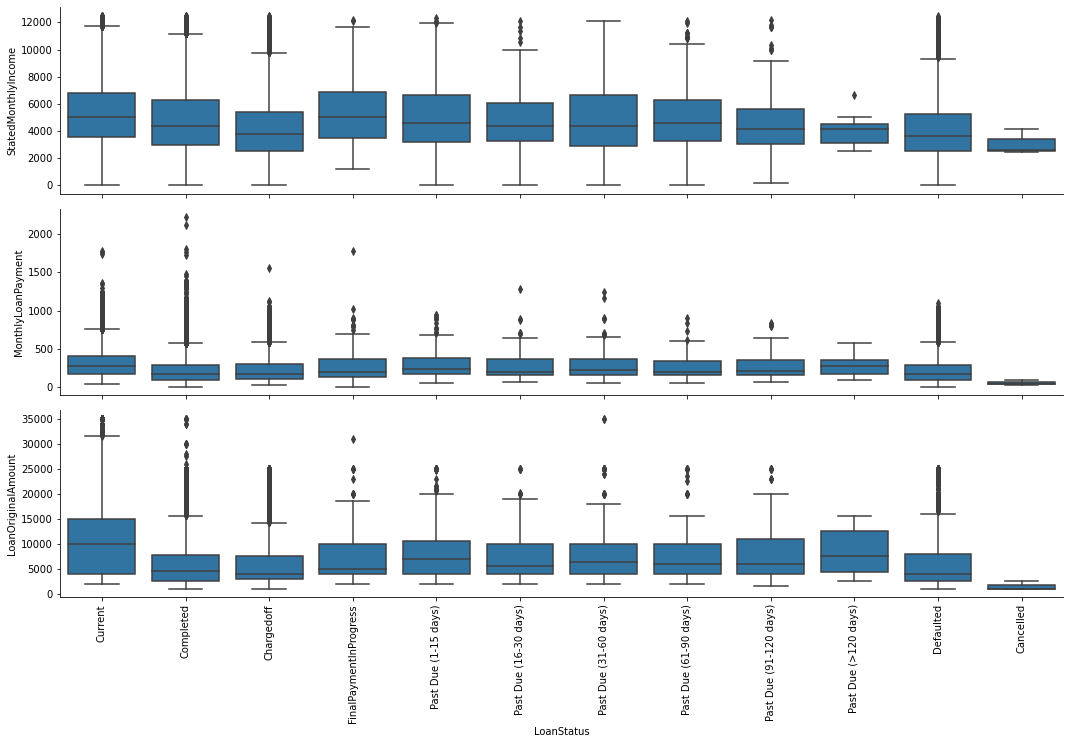

In [37]:
def boxplott(x, y, **kwargs):
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color,order=ordr)
    plt.xticks(rotation=90)
g = sb.PairGrid(data = loan_data, y_vars = num_var, x_vars = 'LoanStatus',
                height = 3, aspect = 5)
g.map(boxplott);

There is a negative correlation between monthly income and Loan status borrowers that passed their due date have a lower income but that is true from past due 1-15 days and borrowers that passed their due date > 120 days have a short distribution in monthly income and there is a slightly positive correlation that borrowers that pass their due data ask for a higher loan amount I will discover more in the next section

In [38]:
# lets reset indexing
loan_data.reset_index(inplace=True)

In [39]:
loan_data.drop('index',axis=1,inplace=True)

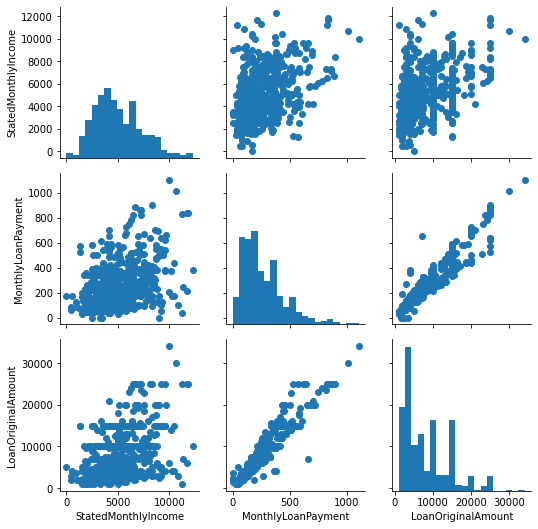

In [40]:
# take a rondom 500 sample from the data and look for them by the index, that is why we reset the index
samples = np.random.choice(loan_data.shape[0], 500, replace = False)
Loan_samp = loan_data.loc[samples,:]

g = sb.PairGrid(data = Loan_samp, vars = num_var)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

there is an approximately positive linear ralation between Monthly loan amount and Loan original amount and not a big correlation between monthly income and monthly loan payment

let's discover the categorical feature with the feature of interest

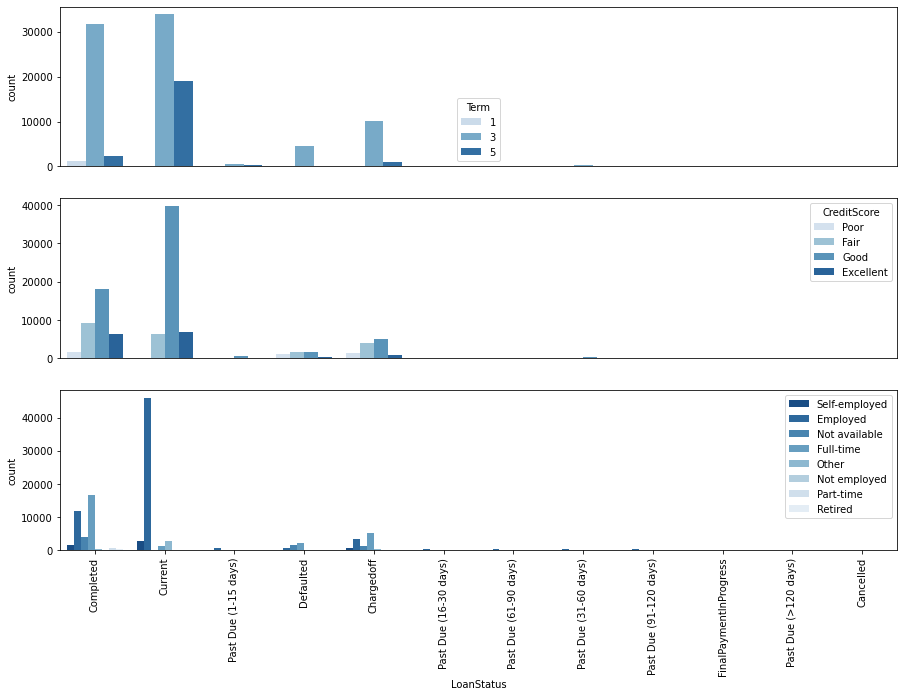

In [41]:
fig , ax = plt.subplots(nrows=3,figsize= [15,10])

sb.countplot(data=loan_data,x='LoanStatus',hue='Term',palette="Blues",ax=ax[0])
ax[0].set_xticks([])
ax[0].set_xlabel('')
sb.countplot(data=loan_data,x='LoanStatus',hue='CreditScore',palette="Blues",ax=ax[1])
ax[1].set_xticks([])
ax[1].set_xlabel('')

sb.countplot(data=loan_data,x='LoanStatus',hue='EmploymentStatus',palette="Blues_r",ax=ax[2])
plt.xticks(rotation = 90);
plt.legend(loc=1);


It doesn't seem to be that, there are much interaction between categorical feature and Loan Status in a completed loans, borrowers often borrow for 3 years and their credit score fall mostly in fair and good, in the current there are 3 and 5 years term and almost no loan for 1 term

Lets discover the relation of categorical features [Term,EmploymentStatus,CreditScore]

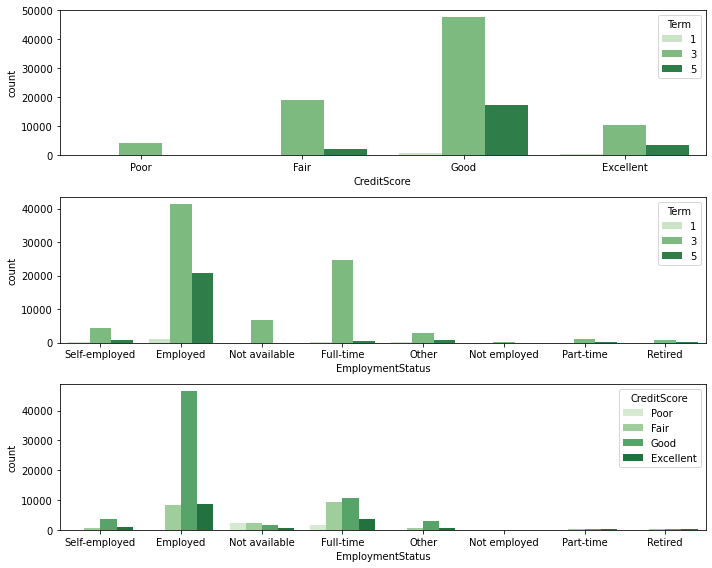

In [42]:
fig, ax = plt.subplots(nrows=3, figsize = [10,8])

default_color = sb.color_palette()[0]
sb.countplot(data = loan_data,x='CreditScore', hue = 'Term',palette='Greens', ax = ax[0])

sb.countplot(data = loan_data,x='EmploymentStatus', hue = 'Term',palette='Greens',  ax = ax[1])

sb.countplot(data = loan_data,x='EmploymentStatus', hue = 'CreditScore',palette='Greens', ax = ax[2])

plt.tight_layout()

There isn't much interaction between CreditScore and Term, it seems like they might be more borrower loan for 3 years and they more employed and they have in much percentage good credit score

Lets discover the relation between numerical features [StatedMonthlyIncome,MonthlyLoanPayment,LoanOriginalAmount] and categorical features[Term,EmploymentStatus,CreditScore]

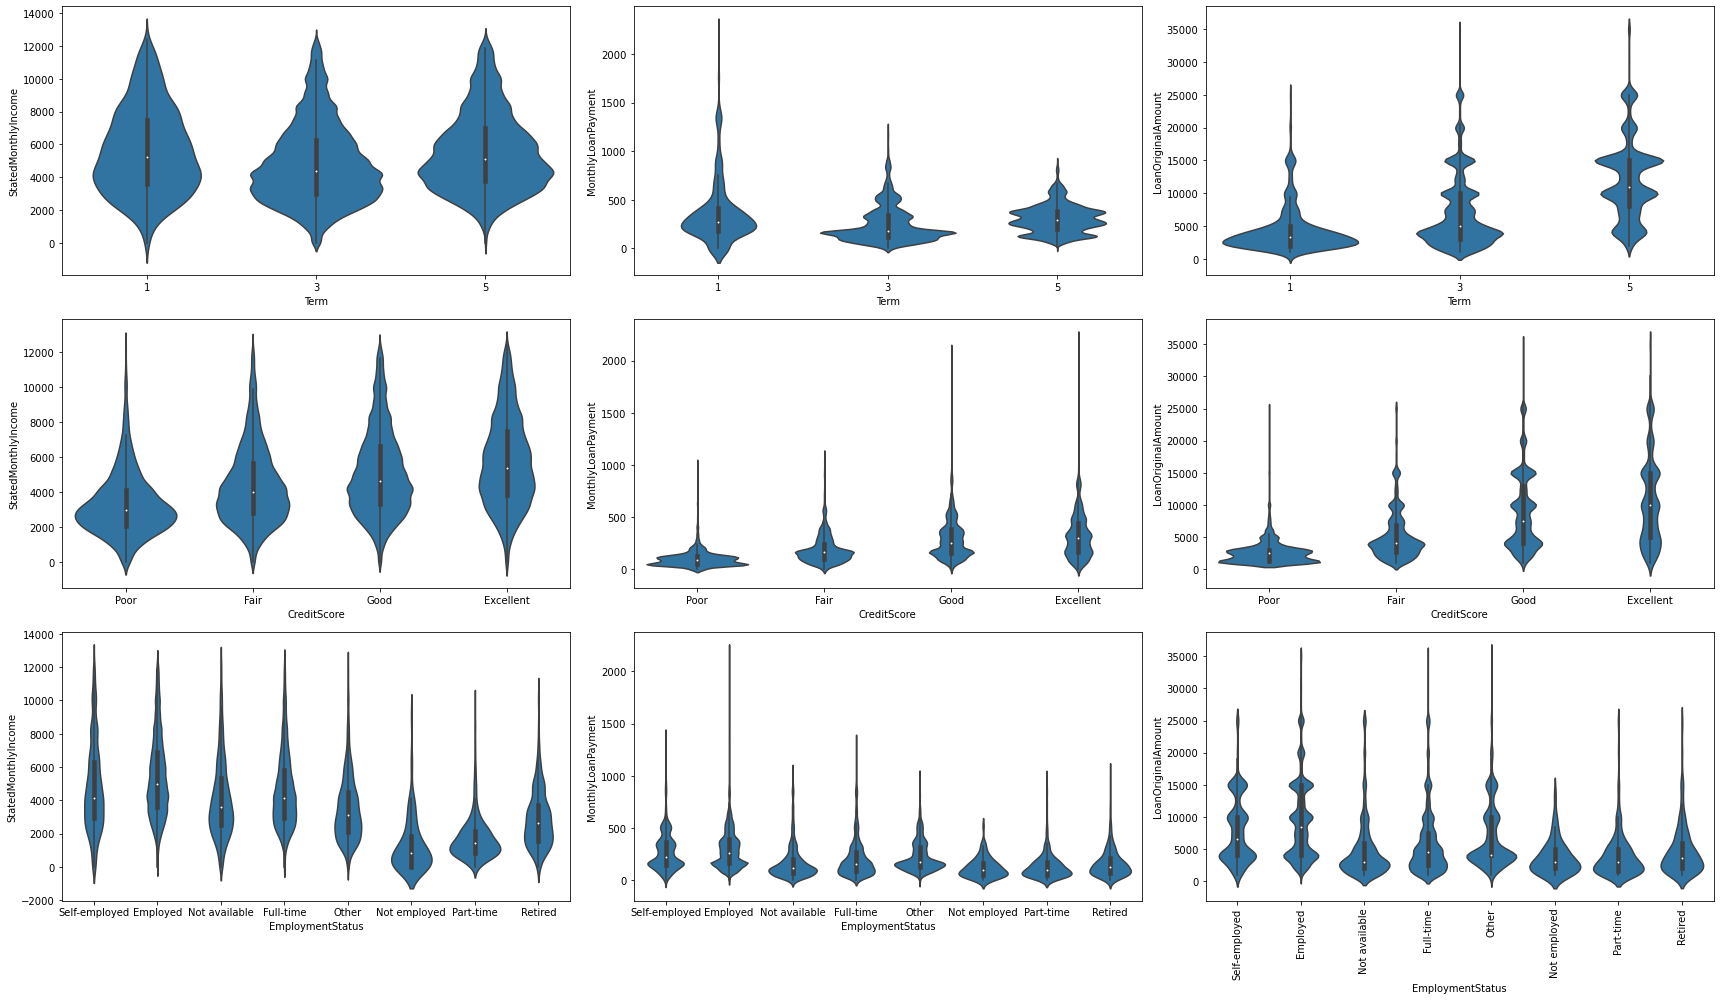

In [43]:
cat_var = ['Term','CreditScore','EmploymentStatus']
fig , ax = plt.subplots(nrows= 3 ,ncols=3,figsize =[24,14])
for i in range(len(cat_var)):
    var = cat_var[i]
    sb.violinplot(data=loan_data,x=var , y='StatedMonthlyIncome',color=default_color, ax=ax[i,0])
    sb.violinplot(data=loan_data,x=var , y='MonthlyLoanPayment' ,color=default_color, ax=ax[i,1])
    sb.violinplot(data=loan_data,x=var , y='LoanOriginalAmount' ,color=default_color, ax=ax[i,2])
    plt.xticks(rotation = 90)
    
    
plt.tight_layout()

It is not high interaction between term and monthly income, in normal higher in term lower in loan monthly payment. But the plot shows that borrowers that loan for 5 years pay much every month and this because that these borrowers make a high Loan amount and it makes sense.
There is a linear correlation in CreditScore and other numeric features and with poor credit scores borrowers pay less each month because they ask for low amounts and borrowers that are not employed have a lower monthly income

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> There is a negative correlation between monthly income and loan status in past due the lower the income, the more will be the delay in payment and their borrowers Loan a high amount

Most of the borrowers loan for 3 years and there is no interaction between Loan Status and term years

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There is an approximately positive relation between Loan Monthly payment and Loan amount. Borrowers that loan for 5 term years pay much each month for this loan and they make a higher loan amount and almost with excellent credit score

## Multivariate Exploration

> The main thing I want to explore in this part of the analysis is how the three numerical feature play into the relationship between Loan Status and its Term

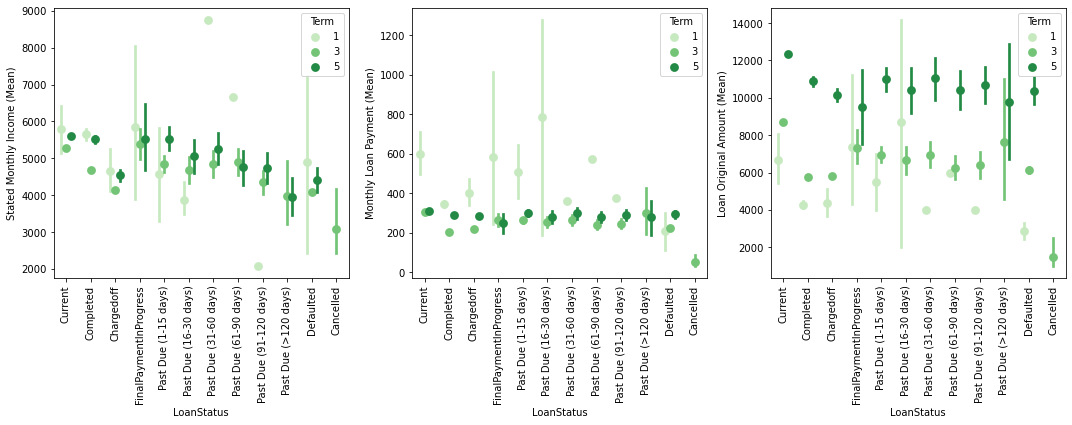

In [44]:
fig, ax = plt.subplots(ncols = 3, figsize = [15,6])

sb.pointplot(data = loan_data, x = 'LoanStatus', y = 'StatedMonthlyIncome', hue = 'Term',order=ordr,
             palette = 'Greens', linestyles = '', dodge = 0.4, ax = ax[0])
ax[0].set_ylabel('Stated Monthly Income (Mean)')
ax[0].set_yticklabels([],minor = True)
ax[0].set_xticklabels(ordr,rotation = 90)

sb.pointplot(data = loan_data, x = 'LoanStatus', y = 'MonthlyLoanPayment', hue = 'Term',order=ordr,
             palette = 'Greens', linestyles = '', dodge = 0.4, ax = ax[1])
ax[1].set_ylabel('Monthly Loan Payment (Mean)')
ax[1].set_yticklabels([],minor = True)
ax[1].set_xticklabels(ordr,rotation = 90)
sb.pointplot(data = loan_data, x = 'LoanStatus', y = 'LoanOriginalAmount', hue = 'Term',order=ordr,
             palette = 'Greens', linestyles = '', dodge = 0.4, ax = ax[2])
ax[2].set_ylabel('Loan Original Amount (Mean)')
ax[2].set_yticklabels([],minor = True)
ax[2].set_xticklabels(ordr,rotation = 90)

plt.tight_layout()
plt.show();

It is clear that the lower the monthly income, the longer the repayment delay. In all cases, the larger the monthly loan payment of loans when the loan is for one year. When the loan is of high amount, the monthly payment of the loan is large and the monthly income is low, The delay in repayment often occurs. Most borrowers who need a loan of high amount make it for 5 Years

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> There is a negative correlation between monthly income and delay in repayment when borrowers ask for 1 term loan and thier income is low and the repayment is the highest in 1 year term so almost they make a delay on repayment in the defaulted status I cant see any evedince to tell me why this borrowers defaulted

### Were there any interesting or surprising interactions between features?

> With More loan amount it seem that the term will be 5 years and high monthly loan payment fall into the 1 year term

## Conclusions
> To conclude, the lower the monthly income the more the delay in payment and most of the borrowers loan for 3 years and there is no interaction between Loan Status and term years. Also there are more borrower loan for 3 years and they mostly employed and they have high percentage of **good** credit score
